# Analiza eksploracyjna `songs.csv`
##### Wcztanie danych

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
songs = pd.read_csv('../data_sets/songs.csv')
songs.columns = ['artysci', 'tytuly', 'data', 'najwyzsza-pozycja', 'liczba-tygodni-w-notowaniu']
songs.head()

,artysci,tytuly,data,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
0,"""Groove"" Holmes",Misty,1966-09-03,44,11
1,"""Groove"" Holmes",What Now My Love,1966-10-15,96,3
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,1965-12-18,15,10
3,"""Pookie"" Hudson",I Know I Know,1963-05-25,96,1
4,"""Weird Al"" Yankovic",Amish Paradise,1996-07-13,53,16


## Statystyki Opisowe

In [45]:
songs.describe().drop(['min'])

,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
count,29681.00000,29681.000000
mean,46.70594,11.124928
std,30.54190,8.309679
25%,18.00000,5.000000
50%,46.00000,10.000000
75%,73.00000,16.000000
max,100.00000,90.000000


## Szeregi rozdzielcze

In [46]:
header_names = songs.columns[3:]
for i in header_names:
    frequency = songs[i].value_counts(bins=20).sort_index().to_frame()
    frequency.columns = ['liczba-utworow']
    display(frequency)

,liczba-utworow
najwyzsza-pozycja,
"(0.9, 5.95]",3030
"(5.95, 10.9]",1980
"(10.9, 15.85]",1606
"(15.85, 20.8]",1401
"(20.8, 25.75]",1348
"(25.75, 30.7]",1349
"(30.7, 35.65]",1289
"(35.65, 40.6]",1313
"(40.6, 45.55]",1327


,liczba-utworow
liczba-tygodni-w-notowaniu,
"(0.91, 5.45]",8621
"(5.45, 9.9]",6179
"(9.9, 14.35]",5798
"(14.35, 18.8]",3209
"(18.8, 23.25]",4092
"(23.25, 27.7]",784
"(27.7, 32.15]",451
"(32.15, 36.6]",179
"(36.6, 41.05]",149


## Histogramy

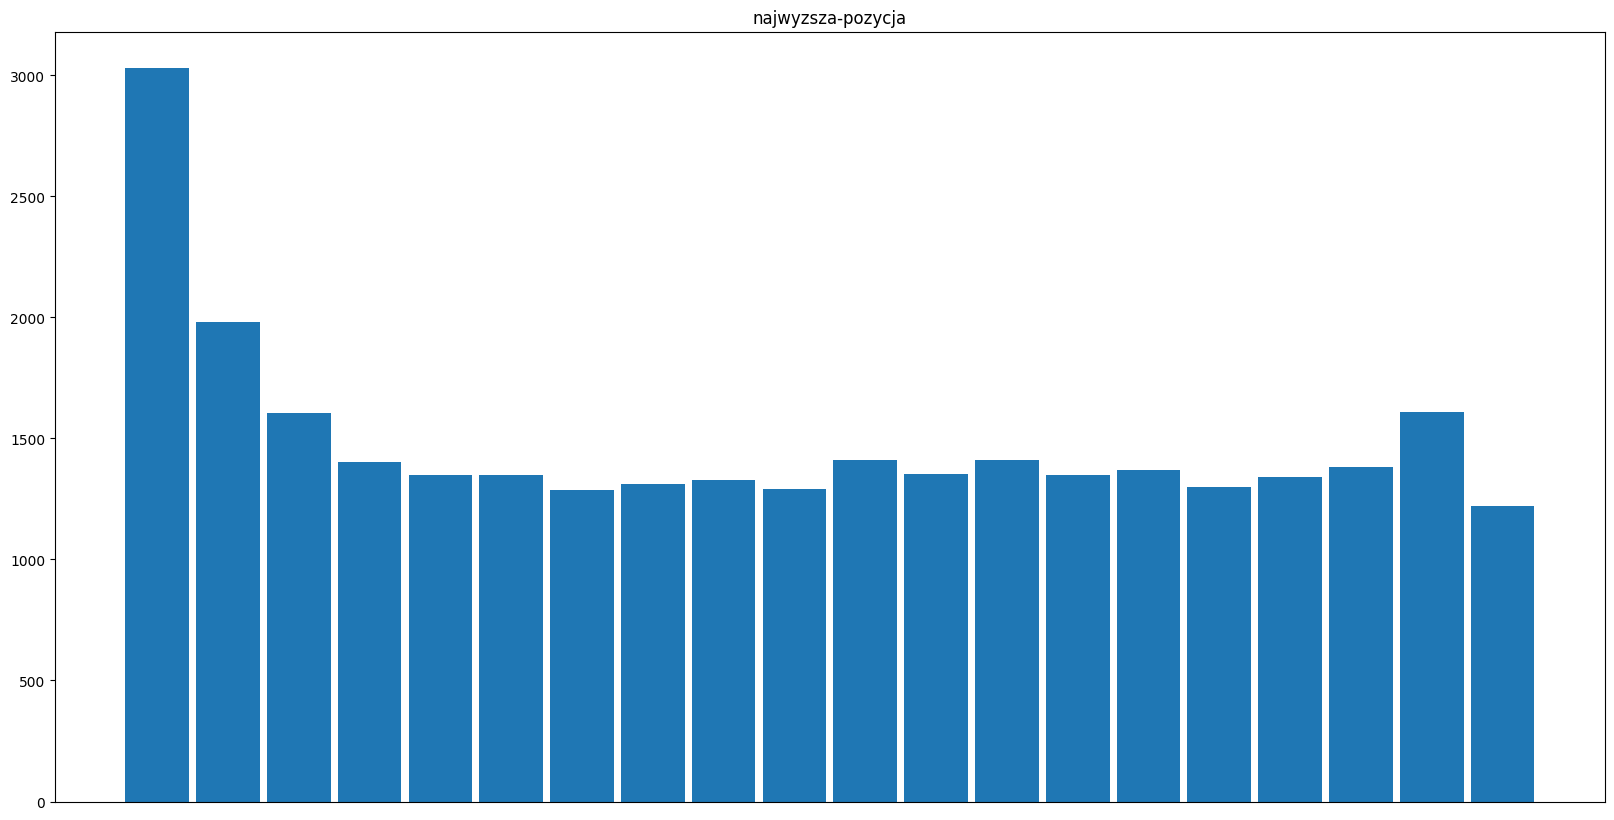

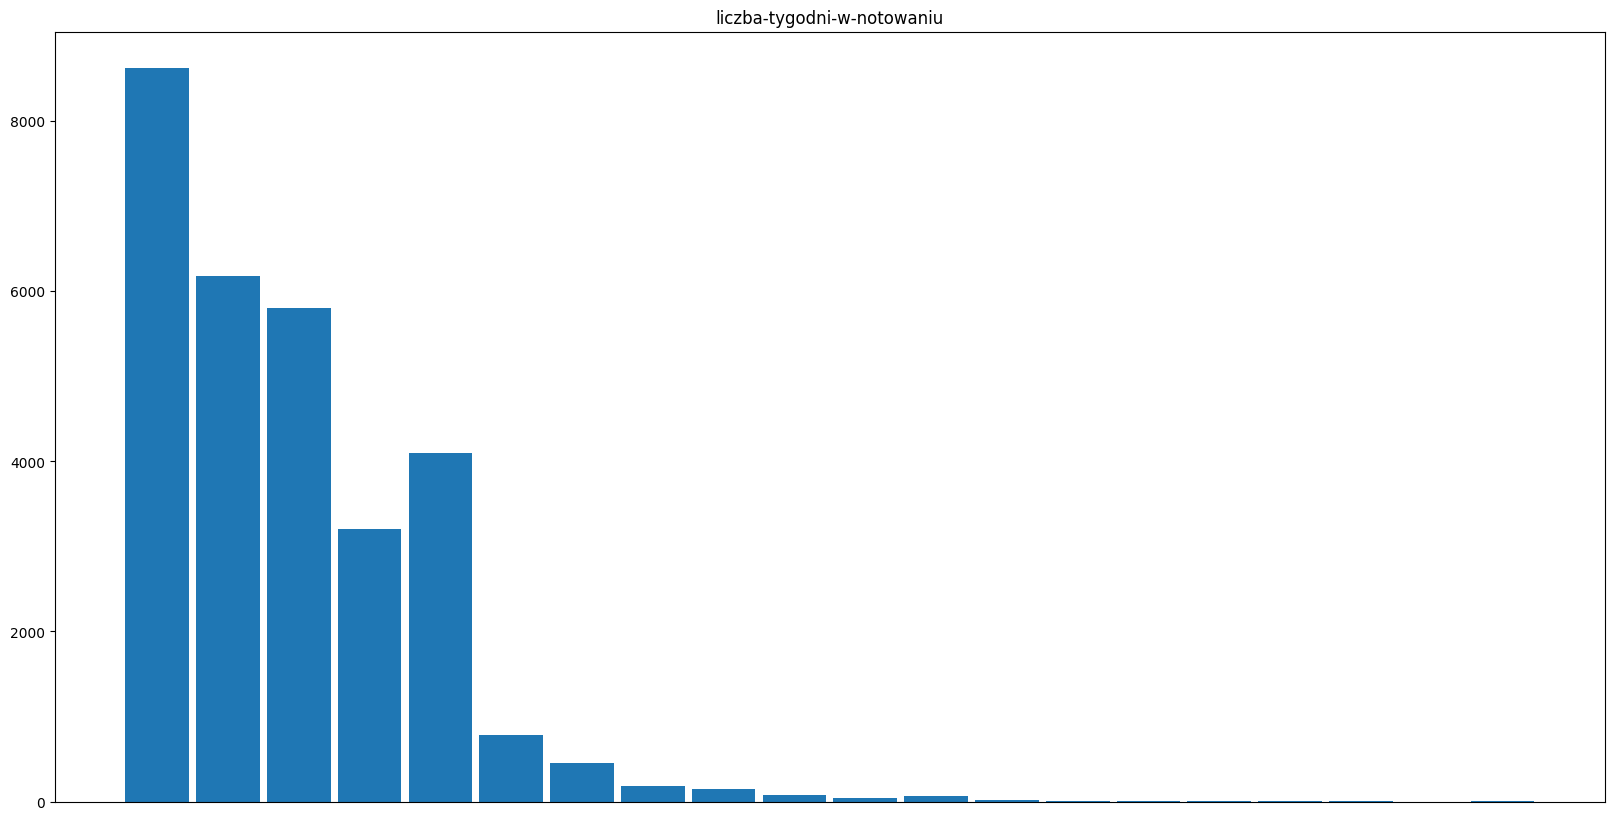

In [47]:
for i in header_names:
    frequency = songs[i].value_counts(bins=20).sort_index().to_frame()
    frequency.columns = ['liczba-utworow']
    plt.figure(figsize=(20, 10))    
    plt.bar(frequency.index.astype(str), frequency['liczba-utworow'], width=0.9, align='center')
    plt.xticks([])
    plt.title(i)
    plt.show()

## Zmiany w czasie

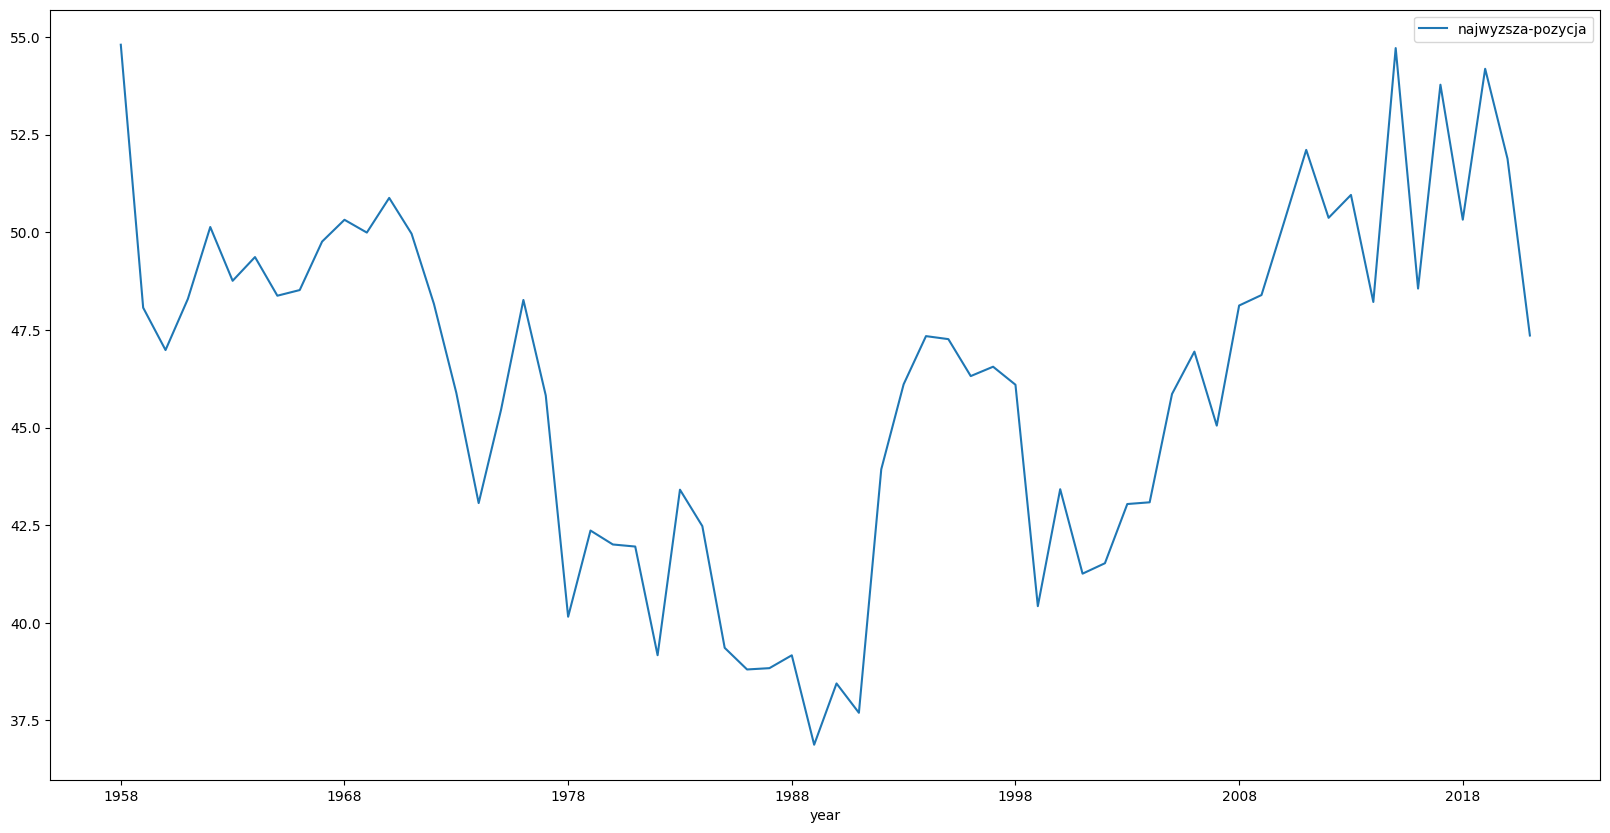

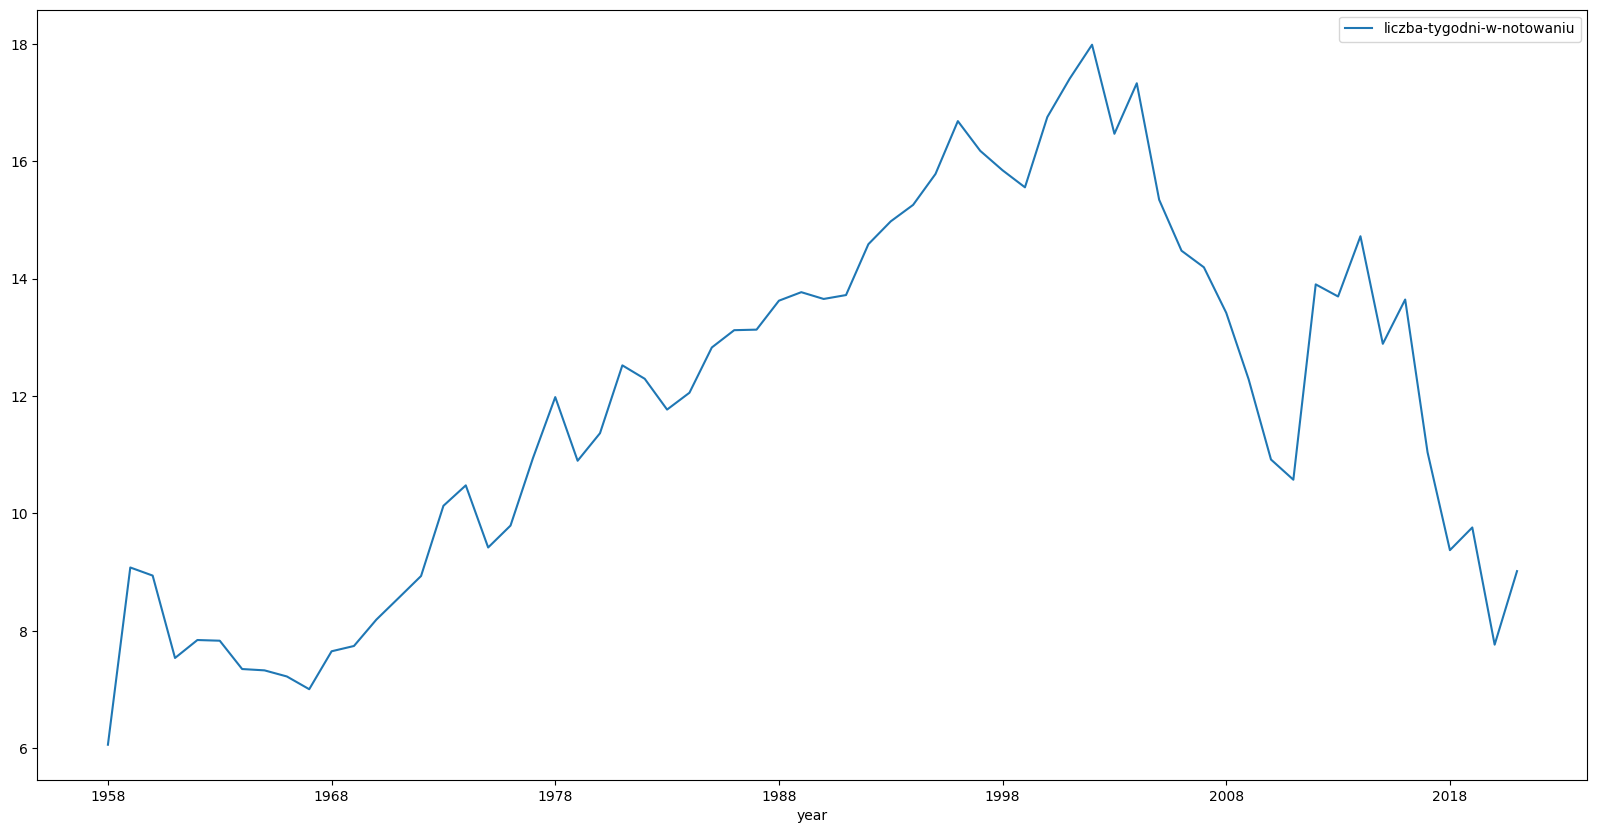

In [48]:
for i in header_names:
    songs['year'] = songs['data'].str[:4]
    year_means = songs.groupby('year').mean(i).drop(header_names.drop([i]), axis=1)
    year_means
    year_means.plot.line(figsize=(20, 10))


## Korelacja między zmiennymi

,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
najwyzsza-pozycja,1.000000,-0.709731
liczba-tygodni-w-notowaniu,-0.709731,1.000000


,najwyzsza-pozycja,liczba-tygodni-w-notowaniu
najwyzsza-pozycja,1.000000,-0.769456
liczba-tygodni-w-notowaniu,-0.769456,1.000000


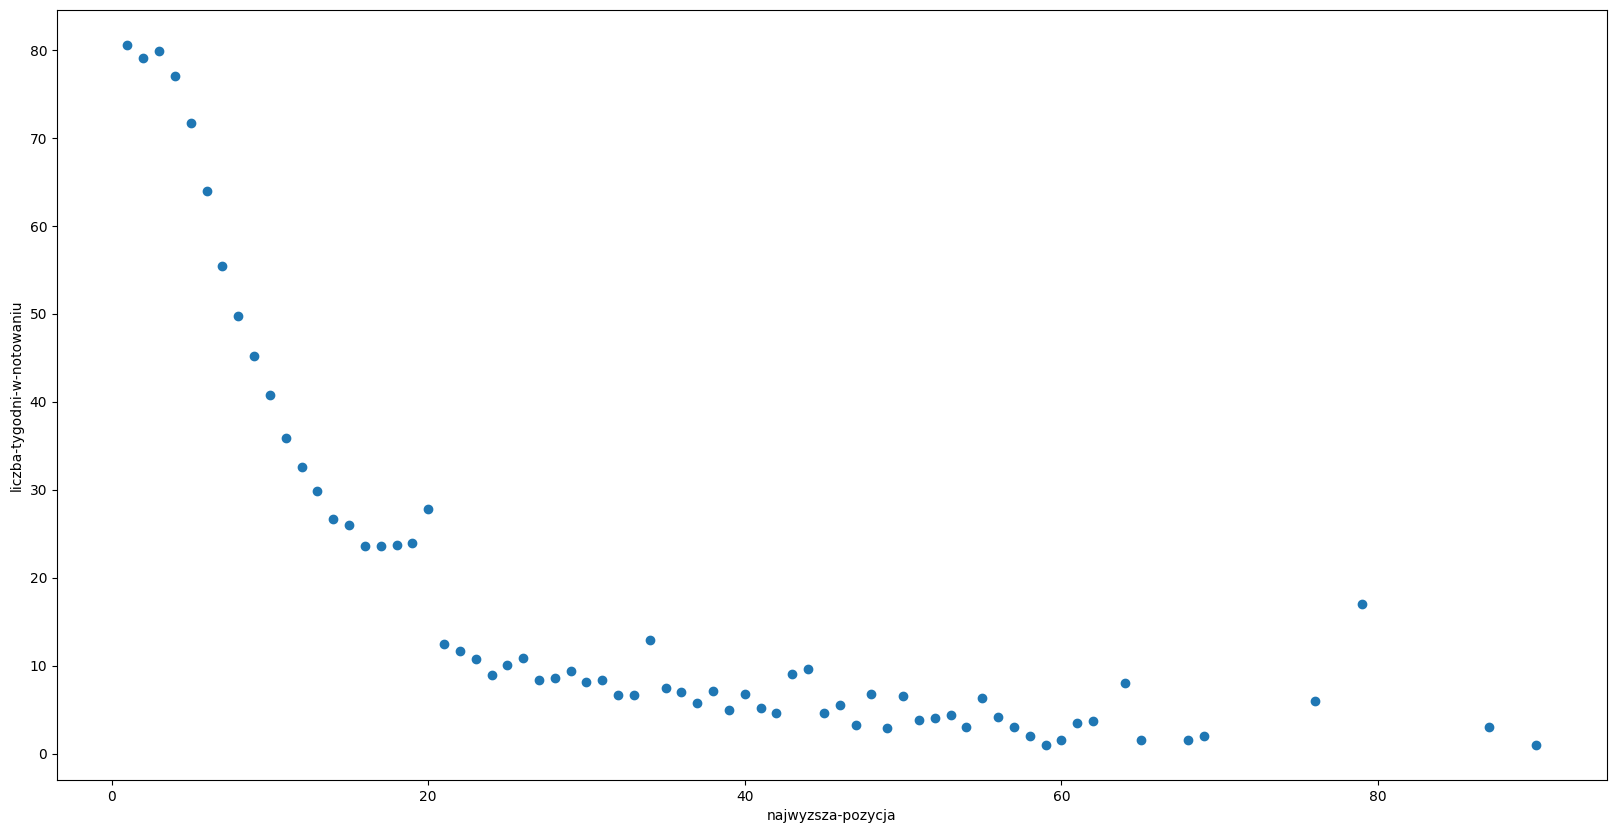

In [49]:
display(songs.corr(method="pearson", numeric_only=True))
display(songs.corr(method="spearman", numeric_only=True))
plt.figure(figsize=(20, 10))
tmp = songs.groupby('liczba-tygodni-w-notowaniu').mean('najwyzsza-pozycja')
plt.scatter(tmp.index, tmp['najwyzsza-pozycja'])
plt.xlabel('najwyzsza-pozycja')
plt.ylabel('liczba-tygodni-w-notowaniu')
plt.show()

## Zmiany w zależności od pojawienia się nowego medium

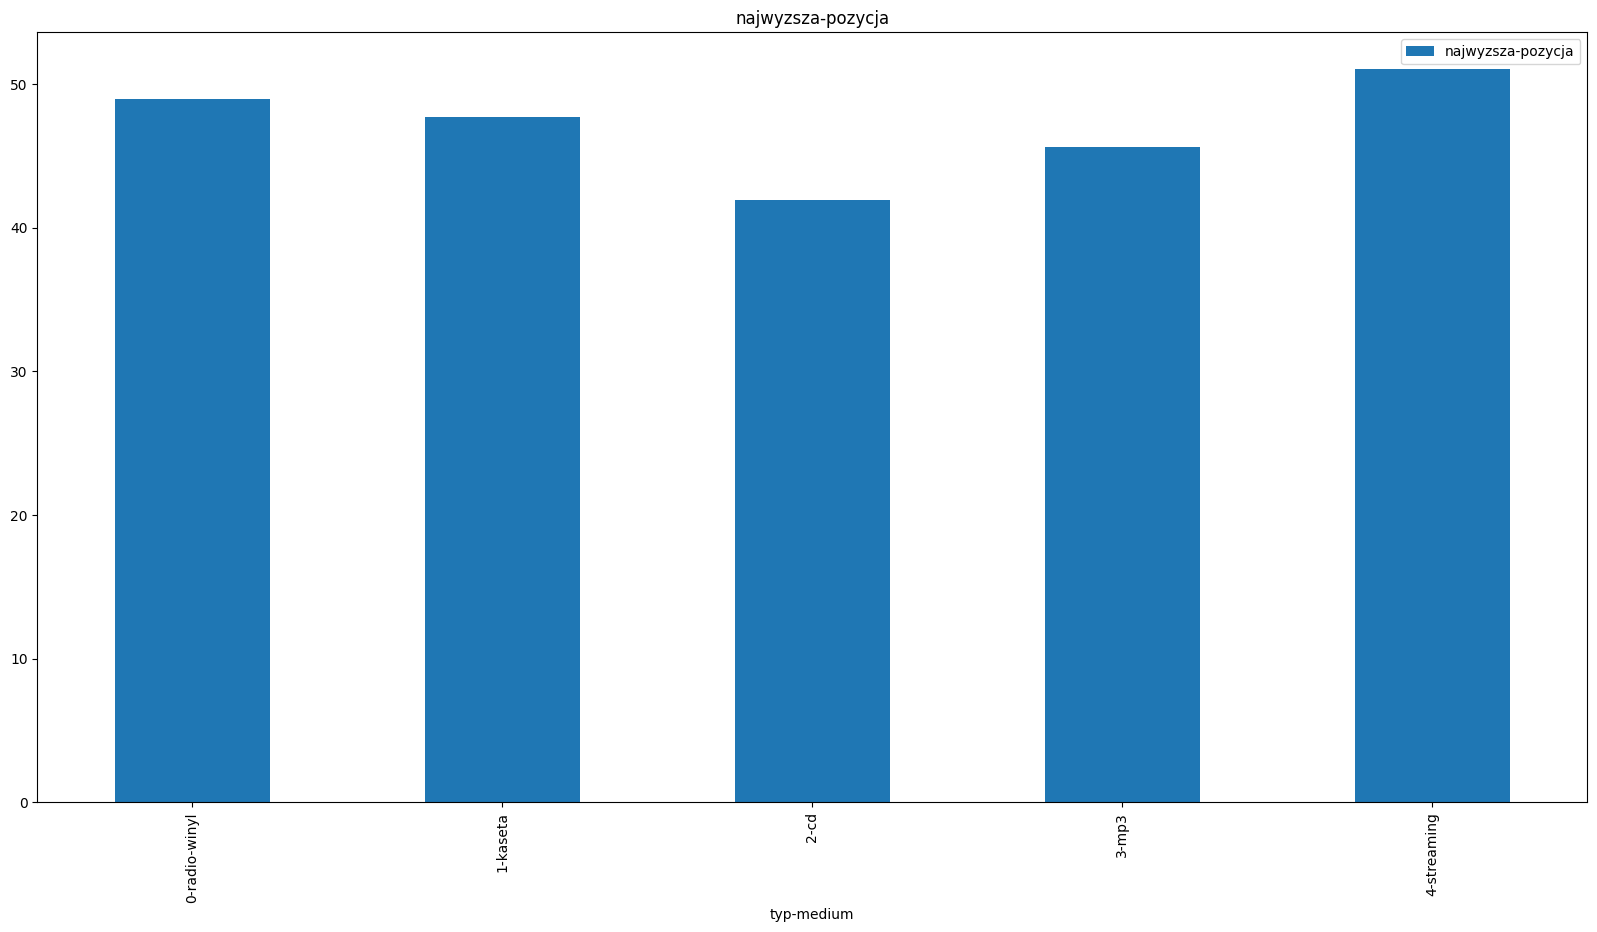

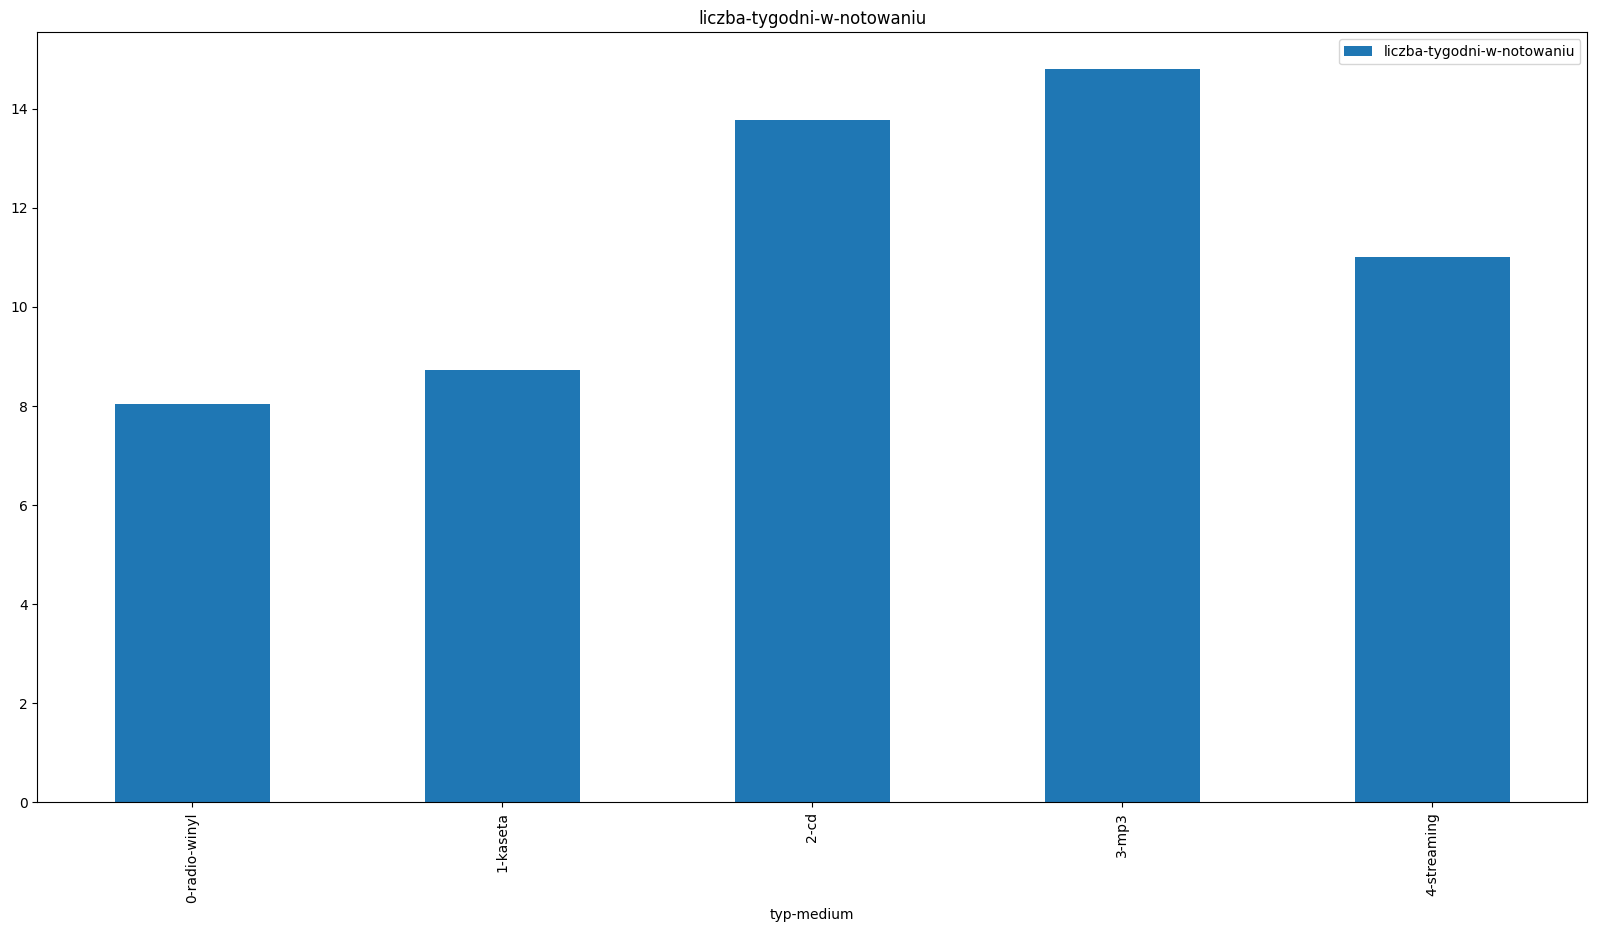

In [90]:
media = ['0-radio-winyl', '1-kaseta', '2-cd', '3-mp3', '4-streaming']
media_years = [1958, 1964, 1980, 2000, 2011]
def get_media_type(year):
    for i in range(len(media_years)):
        if year < media_years[i]:
            return media[i-1]
    return media[-1]
songs['typ-medium'] = songs['year'].apply(int).apply(get_media_type)
for i in header_names:
    media_means = songs.groupby('typ-medium').mean(i).drop(header_names.drop([i]), axis=1)
    media_means.plot.bar(figsize=(20, 10))
    plt.title(i)
    plt.show()